## Linear Regression Example

This notebook demonstrates how to build and train a simple dense neural network for linear regression using the custom ML library.

In [1]:
from ml.regression import LinearRegressionAnalytic, LinearRegressionGradient
from ml.datasets import linear_data
from ml.losses import MeanSquareError
from ml.optimizers import Adam, SGD, Adagrad, RMSprop

import matplotlib.pyplot as plt 

### Generate Synthetic Linear Dataset

We generate a straightforward 1D linear regression dataset with added noise.

In [2]:
x, y = linear_data(end=100, samples=400, noise_scalar=15, slope=2, intercept=-5)

### Visualize the Data

Let's plot the generated data to get a sense of the regression task.

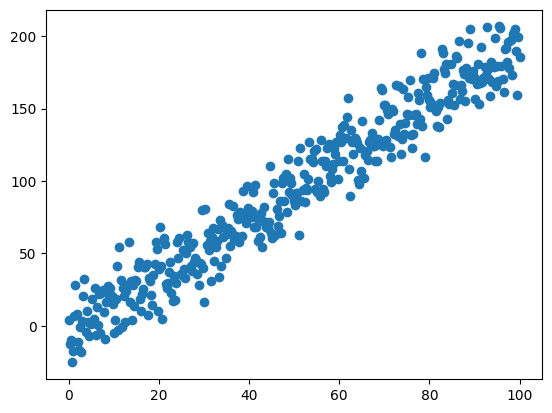

In [3]:
plt.scatter(x,y)

### Implement Linear Regression with Gradient Descent

We first fit a linear regression model using the gradient descent algorithm. The model iteratively updates the weights to minimize the mean squared error between predictions and true values.

In [4]:
model_gradient = LinearRegressionGradient()
model_gradient.set(loss=MeanSquareError(),
                   optimizer=Adam(learning_rate=0.1, decay=0, 
                                  epsilon=1e-7, beta_1=0.9, 
                                  beta_2=0.999))

### Train the Gradient Descent Model

The model is trained over multiple epochs, and we monitor the loss to ensure that the optimization is working correctly.

In [5]:
model_gradient.fit(x, y, epochs=3000)

step: 0, loss: 12490.495424206469
epoch: 1, Acumulated loss: 12490.495424206469
step: 0, loss: 11226.022731400037
epoch: 2, Acumulated loss: 11226.022731400037
step: 0, loss: 10032.395232187631
epoch: 3, Acumulated loss: 10032.395232187631
step: 0, loss: 8910.70943774669
epoch: 4, Acumulated loss: 8910.70943774669
step: 0, loss: 7861.818398432173
epoch: 5, Acumulated loss: 7861.818398432173
step: 0, loss: 6886.29982310432
epoch: 6, Acumulated loss: 6886.29982310432
step: 0, loss: 5984.423468757066
epoch: 7, Acumulated loss: 5984.423468757066
step: 0, loss: 5156.118438190248
epoch: 8, Acumulated loss: 5156.118438190248
step: 0, loss: 4400.941225524188
epoch: 9, Acumulated loss: 4400.941225524188
step: 0, loss: 3718.045577297547
epoch: 10, Acumulated loss: 3718.045577297547
step: 0, loss: 3106.1554815509903
epoch: 11, Acumulated loss: 3106.1554815509903
step: 0, loss: 2563.542842675976
epoch: 12, Acumulated loss: 2563.542842675976
step: 0, loss: 2088.011621681074
epoch: 13, Acumulated lo

### Predictions: Gradient Descent Model

We use the trained gradient descent model to make predictions and compare them with the actual target values.

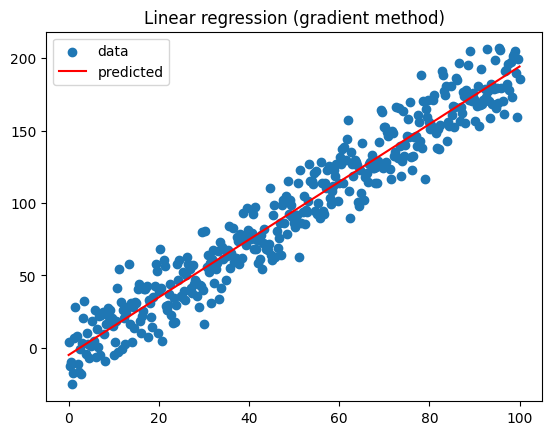

In [6]:
plt.scatter(x, y, label='data')
plt.plot(x, model_gradient.predict(x), color='red', label='predicted')
plt.title("Linear regression (gradient method)")
plt.legend()

### Model Summary and Statistics

Here we present key statistics and performance metrics for the linear regression model trained with gradient descent.

In [7]:
model_gradient.summary(x, y)

======= Linear Regression Summary =======

Number of observations:              400
Dependent variable:                    y
Independent variable:                  x
-----------------------------------------

Model Fit:
R-squared:                         0.940
Mean Square Error (MSE):         213.289
Root Mean Square Error:           14.604
-----------------------------------------

Coefficients:
Intercept (c):                    -4.878
Standard Error:                    1.461

Slope (m):                         1.991
Standard Error:                    0.025


### Analytic Solution for Linear Regression

Next, we solve the same linear regression problem using the analytical (closed-form) solution, often referred to as the normal equation. This method finds the optimal weights in a single calculation.

In [8]:
model_analytic = LinearRegressionAnalytic()

In [9]:
model_analytic.fit(x, y)

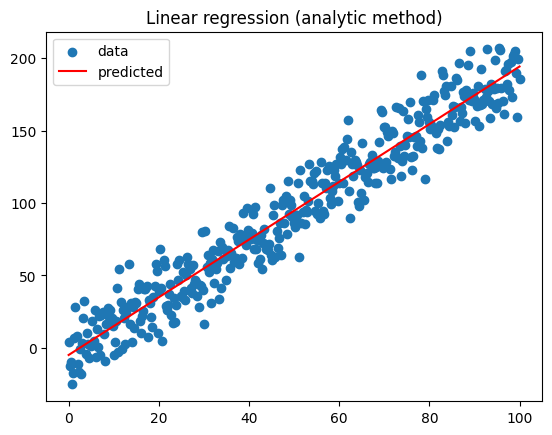

In [10]:
plt.scatter(x, y, label='data')
plt.plot(x, model_analytic.predict(x), color='red', label='predicted')
plt.title("Linear regression (analytic method)")
plt.legend()

In [11]:
model_analytic.summary(x, y)

======= Linear Regression Summary =======

Number of observations:              400
Dependent variable:                    y
Independent variable:                  x
-----------------------------------------

Model Fit:
R-squared:                         0.940
Mean Square Error (MSE):         213.289
Root Mean Square Error:           14.604
-----------------------------------------

Coefficients:
Intercept (c):                    -4.878
Standard Error:                    1.461

Slope (m):                         1.991
Standard Error:                    0.025


In [12]:
print(model_analytic.summary(x,y) == model_gradient.summary(x,y))

======= Linear Regression Summary =======

Number of observations:              400
Dependent variable:                    y
Independent variable:                  x
-----------------------------------------

Model Fit:
R-squared:                         0.940
Mean Square Error (MSE):         213.289
Root Mean Square Error:           14.604
-----------------------------------------

Coefficients:
Intercept (c):                    -4.878
Standard Error:                    1.461

Slope (m):                         1.991
Standard Error:                    0.025
======= Linear Regression Summary =======

Number of observations:              400
Dependent variable:                    y
Independent variable:                  x
-----------------------------------------

Model Fit:
R-squared:                         0.940
Mean Square Error (MSE):         213.289
Root Mean Square Error:           14.604
-----------------------------------------

Coefficients:
Intercept (c):                    -